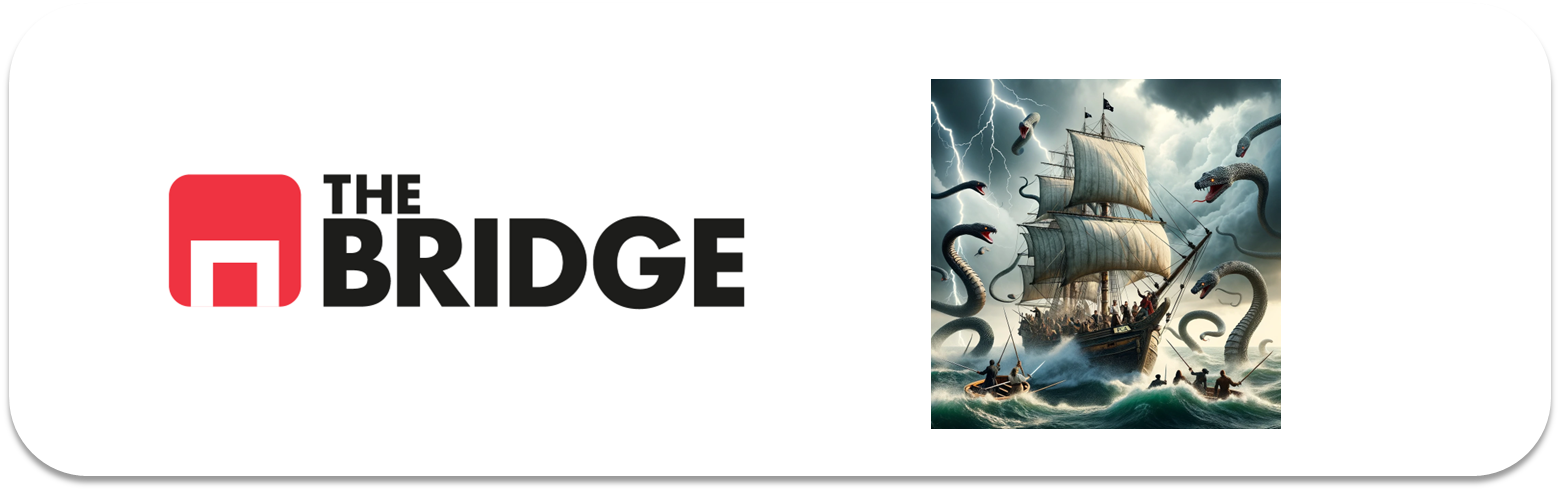

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
#Cargamos las librerias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
sns.set_palette("Set2")

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import bootcampviztools as bt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, RFE, SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, recall_score
from sklearn.feature_selection import SequentialFeatureSelector

#Features
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier


### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [2]:
df_credit = pd.read_csv(r"C:\Users\segur\Desktop\Data Science SL - The Bridge Repositorios\ONLINE_DS_THEBRIDGE_SL\Sprint_14\Unidad_02\Practica_Obligatoria\data\credit_npo.csv")

In [3]:
df_credit.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [4]:
#Hacemos esto porque queremos saber de una vez si tenemos nulos
print(df_credit.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [5]:
print(df_credit.isnull().sum())


SeriousDlqin2yrs                          0
RevolvingUtilizationOfUnsecuredLines      0
age                                       0
NumberOfTime30-59DaysPastDueNotWorse      0
DebtRatio                                 0
MonthlyIncome                           721
NumberOfOpenCreditLinesAndLoans           0
NumberOfTimes90DaysLate                   0
NumberRealEstateLoansOrLines              0
NumberOfTime60-89DaysPastDueNotWorse      0
NumberOfDependents                      177
dtype: int64


In [6]:
print(df_credit['SeriousDlqin2yrs'].value_counts(normalize=True))

SeriousDlqin2yrs
0    0.931084
1    0.068916
Name: proportion, dtype: float64


In [7]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [8]:
#HASTA ACA PERFECTO!

In [9]:
#1. Eliminamos los nulos y operamos con la variable df
df = df_credit.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  float64
dtypes: float64(4), int64

In [12]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [13]:
#Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.
#Chequeamos los rangos en los que podemos operar
#Como es importante Entender si ha caido en algun retraso primer filtro sera ninguna vez, segundo filtro 1-2 veces y luego superior

In [14]:
columnas_a_convertir = ["NumberOfTimes90DaysLate", "NumberOfTime30-59DaysPastDueNotWorse",
                   "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfOpenCreditLinesAndLoans"]

In [15]:
df["SeriousDlqin2yrs"].value_counts(normalize=True)

SeriousDlqin2yrs
0    0.929756
1    0.070244
Name: proportion, dtype: float64

In [16]:
df["NumberOfTimes90DaysLate"].value_counts(normalize=True)

NumberOfTimes90DaysLate
0     0.944144
1     0.033345
2     0.012018
3     0.004570
4     0.002624
5     0.001185
98    0.000846
6     0.000508
8     0.000254
7     0.000254
10    0.000085
9     0.000085
13    0.000085
Name: proportion, dtype: float64

In [17]:
df["RevolvingUtilizationOfUnsecuredLines"].value_counts(normalize=True)

RevolvingUtilizationOfUnsecuredLines
0.000000    0.063727
1.000000    0.062204
0.044530    0.000169
0.022799    0.000169
0.953488    0.000169
              ...   
0.589522    0.000085
0.932423    0.000085
0.048827    0.000085
1.001999    0.000085
0.252566    0.000085
Name: proportion, Length: 10314, dtype: float64

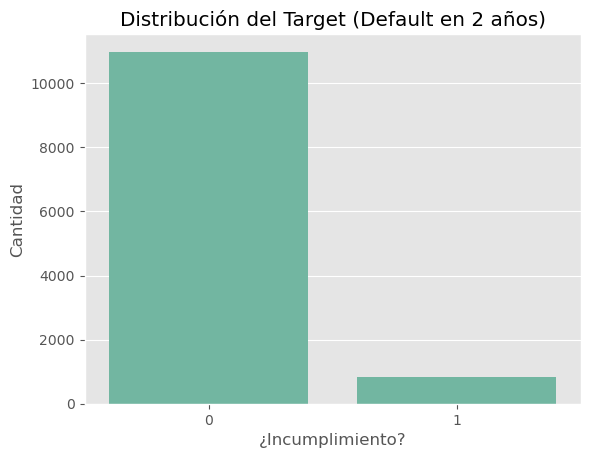

In [18]:
sns.countplot(x='SeriousDlqin2yrs', data=df)
plt.title('Distribución del Target (Default en 2 años)')
plt.xlabel('¿Incumplimiento?')
plt.ylabel('Cantidad')
plt.show()

In [19]:
#Toma df[col] la columna original.
#La cortamos en 3 tramos numéricos con pd.cut():
#(-1, 0]: valores igual a 0  etiqueta '0'
#(0, 2]: valores 1 y 2  etiqueta '1-2'
#(2, +3): valores 3 o más  etiqueta '3+'
#Crea una nueva columna con el mismo nombre más "_cat"

In [20]:
for col in columnas_a_convertir:
    df[col + "_cat"] = pd.cut(
        df[col],
        bins=[-1, 0, 2, np.inf],
        labels=["0", "1", "2"]
    )


C:\Users\segur\AppData\Local\Temp\ipykernel_9756\1978861911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col + "_cat"] = pd.cut(
C:\Users\segur\AppData\Local\Temp\ipykernel_9756\1978861911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col + "_cat"] = pd.cut(
C:\Users\segur\AppData\Local\Temp\ipykernel_9756\1978861911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [21]:
print(df[[col + "_cat" for col in columnas_a_convertir]].dtypes)


NumberOfTimes90DaysLate_cat                 category
NumberOfTime30-59DaysPastDueNotWorse_cat    category
NumberOfTime60-89DaysPastDueNotWorse_cat    category
NumberOfOpenCreditLinesAndLoans_cat         category
dtype: object


In [23]:
#Como primer analisis visual
#SeriousDlqin2yrs:Hay muchos ceros (clientes que no incumplieron) y pocos unos (sí incumplieron).
#RevolvingUtilizationOfUnsecuredLines Muchísimos valores en 0 a 1, pero hay algunos puntos extremos en 4, 5, 6.
# NumberOfTimes30-59/60-89/90DaysPastDueNotWorse muestra que la gran mayoria no se retrasan nunca

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   SeriousDlqin2yrs                          11816 non-null  int64   
 1   RevolvingUtilizationOfUnsecuredLines      11816 non-null  float64 
 2   age                                       11816 non-null  int64   
 3   NumberOfTime30-59DaysPastDueNotWorse      11816 non-null  int64   
 4   DebtRatio                                 11816 non-null  float64 
 5   MonthlyIncome                             11816 non-null  float64 
 6   NumberOfOpenCreditLinesAndLoans           11816 non-null  int64   
 7   NumberOfTimes90DaysLate                   11816 non-null  int64   
 8   NumberRealEstateLoansOrLines              11816 non-null  int64   
 9   NumberOfTime60-89DaysPastDueNotWorse      11816 non-null  int64   
 10  NumberOfDependents         

In [ ]:
#2.1 Analisis visual y correlacion 
# Variable target
target = "SeriousDlqin2yrs"

# Seleccionamos solo las variables numéricas (int o float), sin incluir la target
num_vars = [col for col in df.columns if col != target]

print("Variables numéricas analizadas:", num_vars)

Variables numéricas analizadas: ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents', 'NumberOfTimes90DaysLate_cat', 'NumberOfTime30-59DaysPastDueNotWorse_cat', 'NumberOfTime60-89DaysPastDueNotWorse_cat', 'NumberOfOpenCreditLinesAndLoans_cat']


In [26]:
# Calcular correlación con el target
cor_target = df[num_vars + [target]].corr()[target].drop(target)

# Ordenar por valor absoluto de mayor a menor
cor_target = cor_target.abs().sort_values(ascending=False)

# Mostrar correlación
print("Correlación con el target:\n", cor_target)

Correlación con el target:
 NumberOfTimes90DaysLate_cat                 0.367893
RevolvingUtilizationOfUnsecuredLines        0.280350
NumberOfTime60-89DaysPastDueNotWorse_cat    0.263759
NumberOfTime30-59DaysPastDueNotWorse_cat    0.252499
NumberOfTimes90DaysLate                     0.132191
NumberOfTime30-59DaysPastDueNotWorse        0.131163
age                                         0.106076
NumberOfTime60-89DaysPastDueNotWorse        0.101231
NumberOfOpenCreditLinesAndLoans_cat         0.100538
NumberOfDependents                          0.043825
NumberOfOpenCreditLinesAndLoans             0.029574
MonthlyIncome                               0.022199
DebtRatio                                   0.001666
NumberRealEstateLoansOrLines                0.001321
Name: SeriousDlqin2yrs, dtype: float64


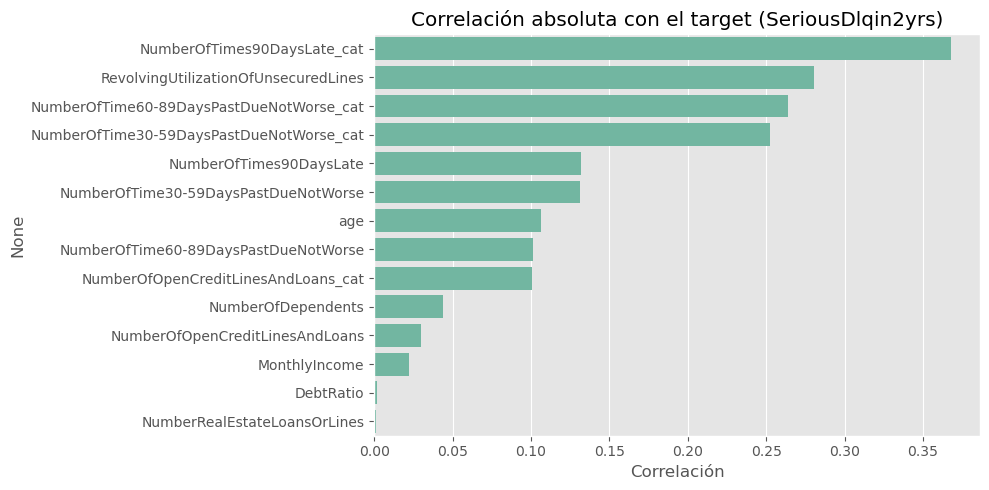

In [27]:
plt.figure(figsize=(10, 5))
sns.barplot(x=cor_target.values, y=cor_target.index)
plt.title("Correlación absoluta con el target (SeriousDlqin2yrs)")
plt.xlabel("Correlación")
plt.tight_layout()
plt.show()

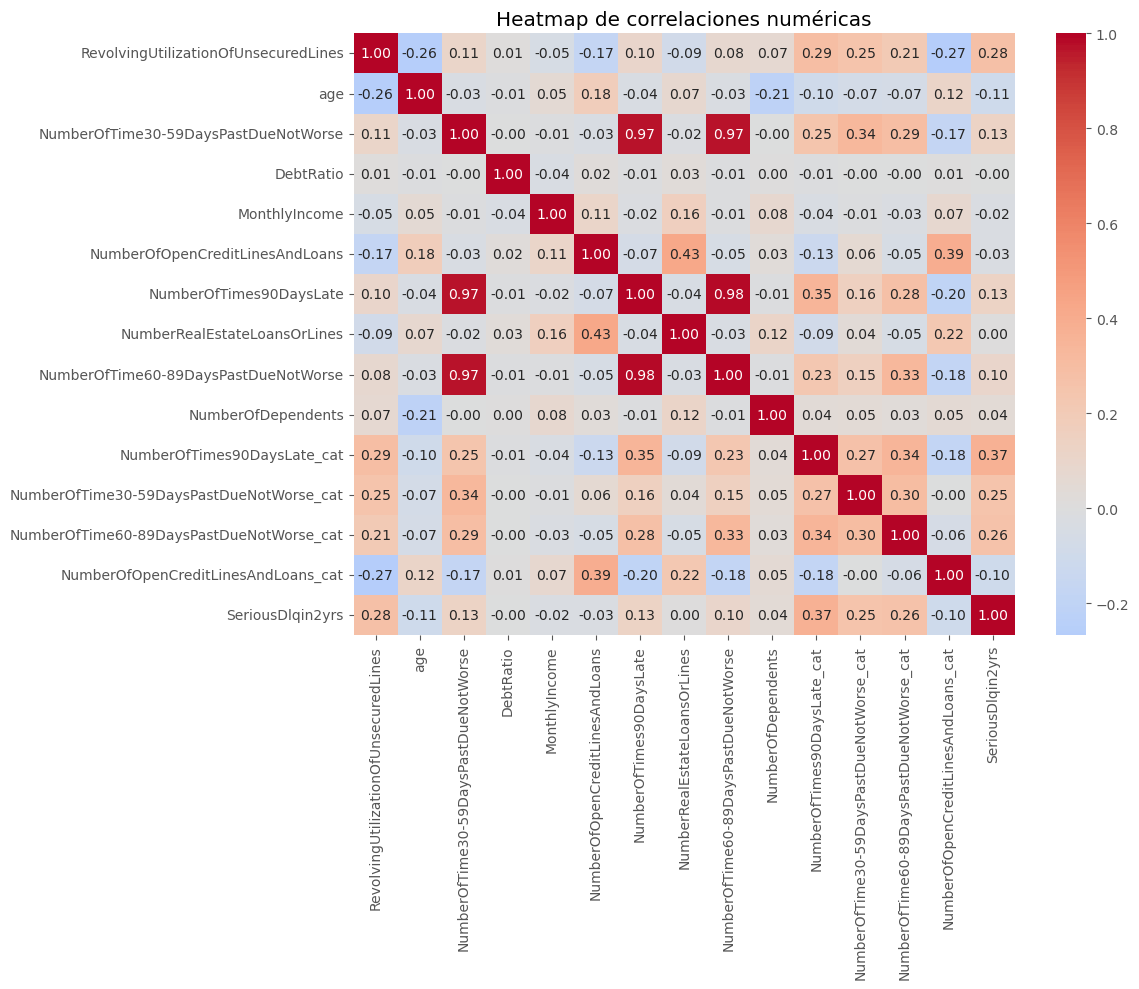

In [31]:
plt.figure(figsize=(12, 10))
corr_matrix = df[num_vars + [target]].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Heatmap de correlaciones numéricas")
plt.tight_layout()
plt.show()

In [34]:
#Seleccion de features (Quitamos las variables que estan altamanete correlacionadas entre ellas)
#Al usar el heatmap y la correlación juntos, identificamos las variables más potentes sin repetir información.

features_lista_1 = [
    'NumberOfTimes90DaysLate_cat',
    'RevolvingUtilizationOfUnsecuredLines',
    'NumberOfOpenCreditLinesAndLoans_cat',
    'age',
    'MonthlyIncome',
    'NumberOfDependents'
]

In [35]:
#MINI EDA
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

# Target
y = df["SeriousDlqin2yrs"]

# Excluimos la variable objetivo
X = df.drop(columns=["SeriousDlqin2yrs"])

In [36]:
# Variables categóricas (las que terminan en '_cat')
cat_vars = [col for col in X.columns if "_cat" in col]

# Variables numéricas continuas (el resto)
num_vars = [col for col in X.columns if col not in cat_vars]

   2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
   
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

Técnica 1: SelectKBest con ANOVA (para numéricas)


In [37]:
# Variable objetivo
y = df["SeriousDlqin2yrs"]

# Seleccionamos solo columnas numéricas continuas (sin _cat)
X_num = df[[col for col in df.columns if "_cat" not in col and col != "SeriousDlqin2yrs"]]

# Aplicamos SelectKBest con ANOVA F-test
selector_kbest = SelectKBest(score_func=f_classif, k=6)
selector_kbest.fit(X_num, y)

# Obtenemos las mejores 
selected_kbest = X_num.columns[selector_kbest.get_support()].tolist()

print("Lista 2 - Features seleccionadas con SelectKBest (ANOVA F-test):")
print(selected_kbest)

Lista 2 - Features seleccionadas con SelectKBest (ANOVA F-test):
['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


Técnica 2: mutual_info_classif (para categóricas)


In [39]:
cat_vars = [col for col in df.columns if "_cat" in col]

X_cat = df[cat_vars]
y = df["SeriousDlqin2yrs"]

X_cat


mi_scores = mutual_info_classif(X_cat, y, discrete_features=True)
mi_series = pd.Series(mi_scores, index=X_cat.columns)

selected_mi = mi_series.sort_values(ascending=False).head(6).index.tolist()

print("Features seleccionadas con Mutual Information:")
print(selected_mi)

Features seleccionadas con Mutual Information:
['NumberOfTimes90DaysLate_cat', 'NumberOfTime30-59DaysPastDueNotWorse_cat', 'NumberOfTime60-89DaysPastDueNotWorse_cat', 'NumberOfOpenCreditLinesAndLoans_cat']


Técnica 3: SelectFromModel con árbol de decisión


In [41]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

selector_model = SelectFromModel(rf_model, max_features=6, prefit=True)
selected_sfm = X.columns[selector_model.get_support()].tolist()

print("Features seleccionadas con SelectFromModel:")
print(selected_sfm)

Features seleccionadas con SelectFromModel:
['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans']


Técnica 4: RFE (Recursive Feature Elimination)


In [42]:
modelo_rfe = LogisticRegression(max_iter=1000, solver='liblinear')
rfe = RFE(modelo_rfe, n_features_to_select=6)
rfe.fit(X, y)

selected_rfe = X.columns[rfe.support_].tolist()
print("Features seleccionadas con RFE:")
print(selected_rfe)

Features seleccionadas con RFE:
['RevolvingUtilizationOfUnsecuredLines', 'NumberRealEstateLoansOrLines', 'NumberOfTimes90DaysLate_cat', 'NumberOfTime30-59DaysPastDueNotWorse_cat', 'NumberOfTime60-89DaysPastDueNotWorse_cat', 'NumberOfOpenCreditLinesAndLoans_cat']


Técnica 5: SequentialFeatureSelector (SFS)

In [44]:
modelo_sfs = LogisticRegression(max_iter=1000, solver='liblinear')
sfs = SequentialFeatureSelector(modelo_sfs, n_features_to_select=6, direction="forward")
sfs.fit(X, y)

selected_sfs = X.columns[sfs.get_support()].tolist()
print("Features seleccionadas con SFS:")
print(selected_sfs)

Features seleccionadas con SFS:
['NumberOfTime30-59DaysPastDueNotWorse', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents', 'NumberOfTimes90DaysLate_cat', 'NumberOfTime30-59DaysPastDueNotWorse_cat']


Técnica 6: Hard Voting


In [ ]:
# Unificamos todas las listas de features seleccionadas
listas_features = [
    selected_kbest,
    selected_mi,
    selected_sfm,
    selected_rfe,
    selected_sfs
]

listas_features

[['RevolvingUtilizationOfUnsecuredLines',
  'age',
  'NumberOfTime30-59DaysPastDueNotWorse',
  'NumberOfTimes90DaysLate',
  'NumberOfTime60-89DaysPastDueNotWorse',
  'NumberOfDependents'],
 ['NumberOfTimes90DaysLate_cat',
  'NumberOfTime30-59DaysPastDueNotWorse_cat',
  'NumberOfTime60-89DaysPastDueNotWorse_cat',
  'NumberOfOpenCreditLinesAndLoans_cat'],
 ['RevolvingUtilizationOfUnsecuredLines',
  'age',
  'DebtRatio',
  'MonthlyIncome',
  'NumberOfOpenCreditLinesAndLoans'],
 ['RevolvingUtilizationOfUnsecuredLines',
  'NumberRealEstateLoansOrLines',
  'NumberOfTimes90DaysLate_cat',
  'NumberOfTime30-59DaysPastDueNotWorse_cat',
  'NumberOfTime60-89DaysPastDueNotWorse_cat',
  'NumberOfOpenCreditLinesAndLoans_cat'],
 ['NumberOfTime30-59DaysPastDueNotWorse',
  'NumberRealEstateLoansOrLines',
  'NumberOfTime60-89DaysPastDueNotWorse',
  'NumberOfDependents',
  'NumberOfTimes90DaysLate_cat',
  'NumberOfTime30-59DaysPastDueNotWorse_cat']]

In [47]:
from collections import Counter

# Aplanar la lista y contar ocurrencias
todas = sum(listas_features, [])
conteo = Counter(todas)

# Seleccionamos las que aparecen al menos 3 veces
features_votadas = [feature for feature, count in conteo.items() if count >= 3]

print("Features seleccionadas por Hard Voting (≥ 3 métodos):")
print(features_votadas)

Features seleccionadas por Hard Voting (≥ 3 métodos):
['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTimes90DaysLate_cat', 'NumberOfTime30-59DaysPastDueNotWorse_cat']



3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

In [48]:
modelos = {
    "LogisticRegression": LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear'),
    "RandomForest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

In [50]:
listas_features_dict = {
    "KBest": selected_kbest,
    "MutualInfo": selected_mi,
    "SelectFromModel": selected_sfm,
    "RFE": selected_rfe,
    "SFS": selected_sfs,
    "HardVoting": features_votadas
}

listas_features_dict

{'KBest': ['RevolvingUtilizationOfUnsecuredLines',
  'age',
  'NumberOfTime30-59DaysPastDueNotWorse',
  'NumberOfTimes90DaysLate',
  'NumberOfTime60-89DaysPastDueNotWorse',
  'NumberOfDependents'],
 'MutualInfo': ['NumberOfTimes90DaysLate_cat',
  'NumberOfTime30-59DaysPastDueNotWorse_cat',
  'NumberOfTime60-89DaysPastDueNotWorse_cat',
  'NumberOfOpenCreditLinesAndLoans_cat'],
 'SelectFromModel': ['RevolvingUtilizationOfUnsecuredLines',
  'age',
  'DebtRatio',
  'MonthlyIncome',
  'NumberOfOpenCreditLinesAndLoans'],
 'RFE': ['RevolvingUtilizationOfUnsecuredLines',
  'NumberRealEstateLoansOrLines',
  'NumberOfTimes90DaysLate_cat',
  'NumberOfTime30-59DaysPastDueNotWorse_cat',
  'NumberOfTime60-89DaysPastDueNotWorse_cat',
  'NumberOfOpenCreditLinesAndLoans_cat'],
 'SFS': ['NumberOfTime30-59DaysPastDueNotWorse',
  'NumberRealEstateLoansOrLines',
  'NumberOfTime60-89DaysPastDueNotWorse',
  'NumberOfDependents',
  'NumberOfTimes90DaysLate_cat',
  'NumberOfTime30-59DaysPastDueNotWorse_cat'],


In [51]:
from sklearn.metrics import make_scorer, recall_score

scorer = make_scorer(recall_score)

resultados = []

for nombre_modelo, modelo in modelos.items():
    for nombre_seleccion, columnas in listas_features_dict.items():
        X_subset = X[columnas]
        scores = cross_val_score(modelo, X_subset, y, cv=5, scoring='recall')
        resultados.append({
            'Modelo': nombre_modelo,
            'Features': nombre_seleccion,
            'Recall medio': round(scores.mean(), 4)
        })

c:\Users\segur\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\segur\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\segur\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\segur\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\segur\anaconda3\Lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_pred = prediction_method(X)
             ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\segur\anaconda3\Lib\site-packages\sklearn\linear_model\_base.py", 

In [52]:
df_resultados = pd.DataFrame(resultados).sort_values(by='Recall medio', ascending=False)
print(df_resultados)

                Modelo         Features  Recall medio
0   LogisticRegression            KBest        0.7289
2   LogisticRegression  SelectFromModel        0.7253
7         RandomForest       MutualInfo        0.6542
10        RandomForest              SFS        0.4590
11        RandomForest       HardVoting        0.3819
9         RandomForest              RFE        0.3373
12    GradientBoosting            KBest        0.2048
6         RandomForest            KBest        0.1831
15    GradientBoosting              RFE        0.1699
17    GradientBoosting       HardVoting        0.1578
16    GradientBoosting              SFS        0.1422
13    GradientBoosting       MutualInfo        0.1361
14    GradientBoosting  SelectFromModel        0.0458
8         RandomForest  SelectFromModel        0.0410
1   LogisticRegression       MutualInfo           NaN
3   LogisticRegression              RFE           NaN
4   LogisticRegression              SFS           NaN
5   LogisticRegression      

In [54]:
# las 3 mejores estan claras
# LogisticRegression            KBest        0.7289
# LogisticRegression  SelectFromModel        0.7253
# RandomForest       MutualInfo        0.6542

### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.